<a href="https://colab.research.google.com/github/IvanAjala/data-science-portfolio/blob/main/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20(EDA)/churn_analysis/notebooks/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [11]:
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/IvanAjala/data-science-portfolio/main/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20(EDA)/churn_analysis/data/Churn.csv'

# Importa a base de dados
dataset = pd.read_csv(url, sep=';')

# Visualiza
dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [12]:
dataset.shape

(999, 12)

In [13]:
# Renomeia as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                  "Ativo","Salario","Saiu"]

In [14]:
dataset.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0


In [39]:
# verificando o balanceamento da variavel dependente (target)
dataset['Saiu'].value_counts()

,count
Saiu,
0,796
1,203


In [40]:
# visualizando em porcentagem

dataset['Saiu'].value_counts(normalize=True) * 100


,proportion
Saiu,
0,79.67968
1,20.32032


In [21]:
# Verificando os tipos de variaveis

dataset.dtypes


,0
Id,int64
Score,int64
Estado,object
Genero,object
Idade,int64
Patrimonio,int64
Saldo,int64
Produtos,int64
TemCartCredito,int64
Ativo,int64


In [15]:
# Explorando dados categóricos
# Estado
dataset['Estado'].unique()

array(['RS', 'SC', 'PR', 'RP', 'SP', 'TD'], dtype=object)

In [16]:
dataset['Estado'].value_counts()

,count
Estado,
RS,478
SC,258
PR,257
SP,4
RP,1
TD,1


In [18]:
# Explorando dados categóricos
#Genero
dataset['Genero'].unique()

array(['Feminino', 'Masculino', 'M', nan, 'F', 'Fem'], dtype=object)

In [17]:
dataset['Genero'].value_counts()

,count
Genero,
Masculino,521
Feminino,461
M,6
F,2
Fem,1


Text(0.5, 1.0, 'Genero')

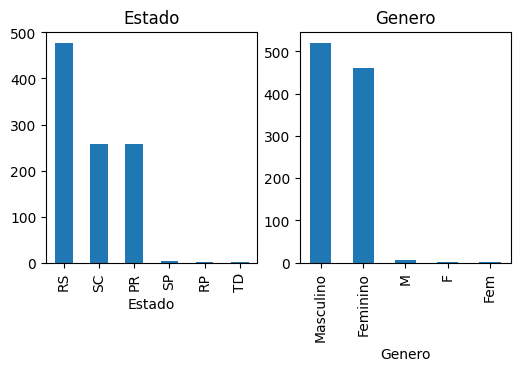

In [22]:
# visualizar graficos das variaveis categoricas Estado e Genero

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(6,3))

dataset['Estado'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Estado')

dataset['Genero'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Genero')


In [23]:
# Explorando dados numericos
dataset.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


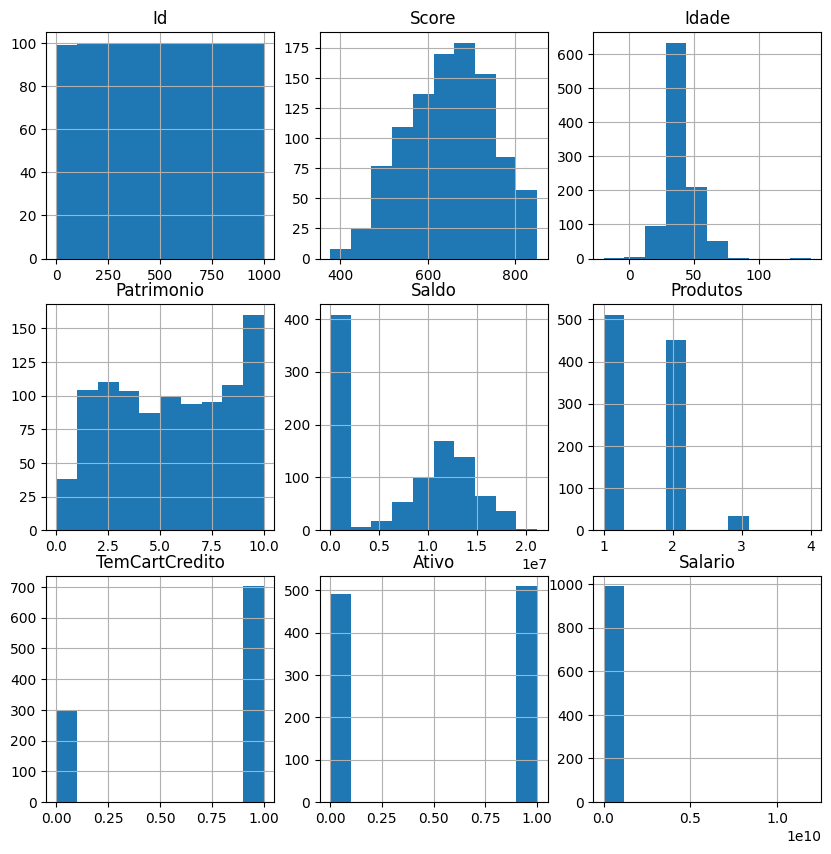

In [24]:
# visualizar graficamente as variaveis numericas

%matplotlib inline

num_attributes = dataset.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,10))

count = 0
for i in range(3):
  for j in range(3):
    count += 1
    if count < len(num_attributes.columns):
      num_attributes.iloc[:, count-1].hist(ax=axes[i][j], bins=10)
      axes[i][j].set_title(num_attributes.columns[count-1])


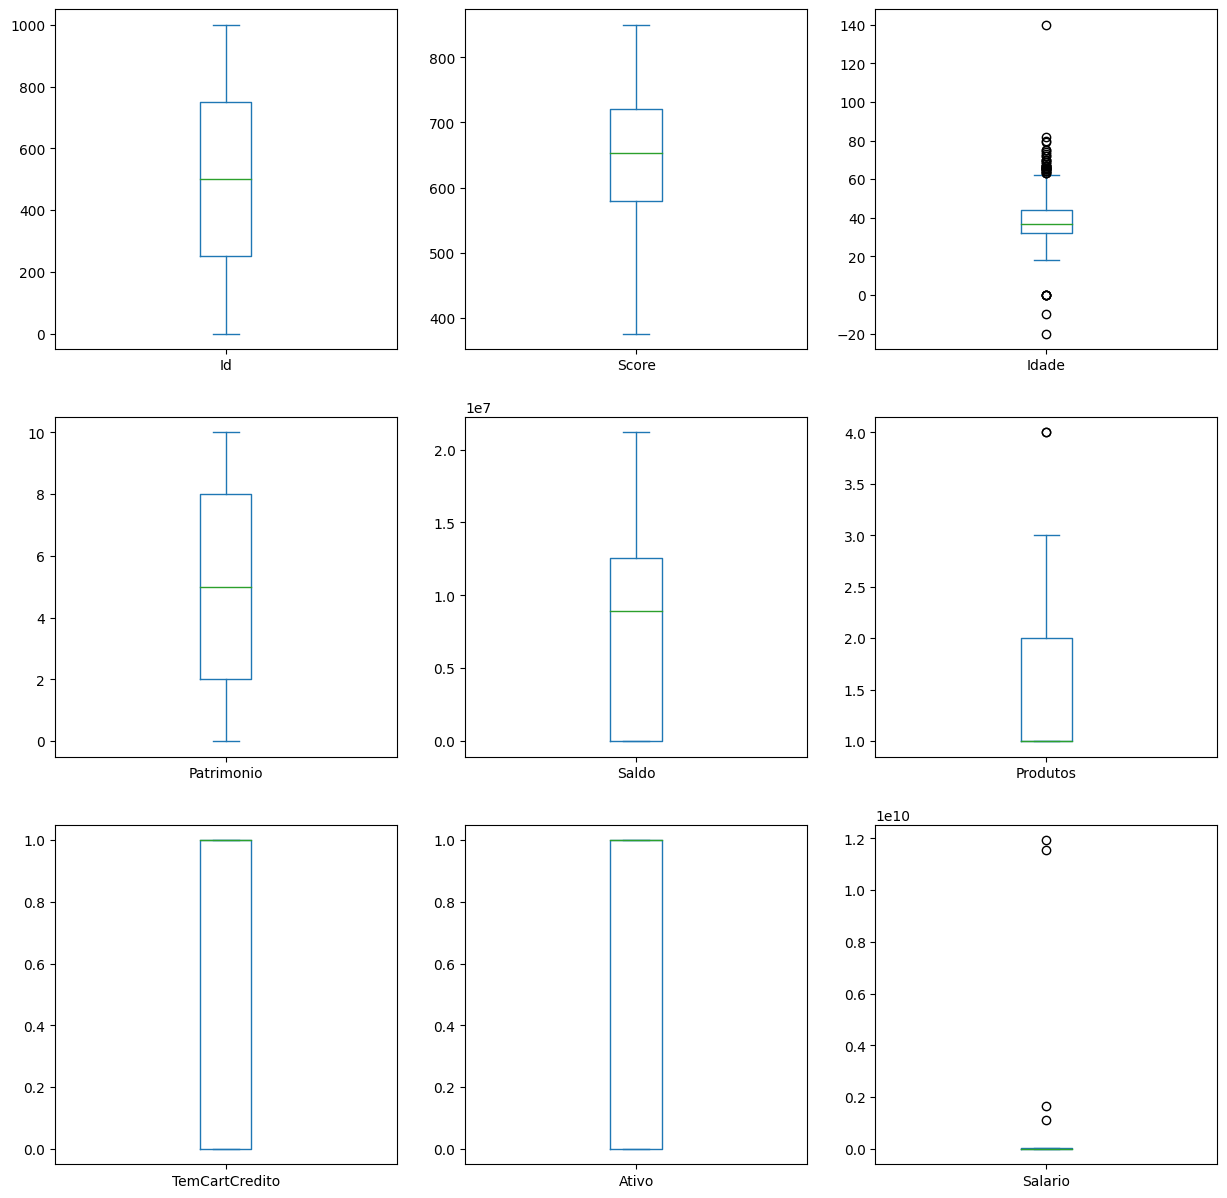

In [25]:
# visualizar graficamente com graficos os outliers das variaveis numericas

%matplotlib inline

num_attributes = dataset.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

count = 0
for i in range(3):
  for j in range(3):
    count += 1
    if count < len(num_attributes.columns):
      num_attributes.iloc[:, count-1].plot(kind='box', ax=axes[i][j])


In [26]:
# Visualizar dados faltantes
dataset.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [27]:
dataset['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


In [28]:
dataset['Salario'].median()

8703249.5

In [29]:
# Tratamento de dados faltantes
# Genero e Salário
# Salário - Substituir pela mediana
dataset['Salario'].fillna(dataset['Salario'].median(), inplace = True)
dataset['Salario'].isnull().sum()

0

In [30]:
dataset['Genero'].describe()

,Genero
count,991
unique,5
top,Masculino
freq,521


In [31]:
# Genero - Substituir pela moda (Masculino)
dataset['Genero'].fillna(dataset['Genero'].mode()[0], inplace = True)
dataset['Genero'].isnull().sum()

0

In [32]:
# validando se ainda existem valores faltantes
dataset.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,0
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [33]:
# Verificando dados inconsistentes
# Estado
dataset['Estado'].value_counts()

,count
Estado,
RS,478
SC,258
PR,257
SP,4
RP,1
TD,1


In [35]:
dataset['Estado'].describe()

,Estado
count,999
unique,3
top,RS
freq,484


In [34]:
# Padronizar de acordo com o dominio os valores SP, RP e TD pela moda (RS)
dataset.loc[dataset['Estado'].isin(['SP', 'RP', 'TD']), 'Estado'] = dataset['Estado'].mode()[0]
dataset['Estado'].value_counts()


,count
Estado,
RS,484
SC,258
PR,257


In [36]:
# Genero
dataset['Genero'].value_counts()

,count
Genero,
Masculino,529
Feminino,461
M,6
F,2
Fem,1


In [37]:
# Padronizar Genero de acordo, onde ('M' por "Masculino' e 'Fem' e 'F' por 'Feminino')
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
dataset['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [38]:
dataset['Genero'].value_counts()

,count
Genero,
Masculino,535
Feminino,464


Text(0.5, 1.0, 'Boxplot de Salário')

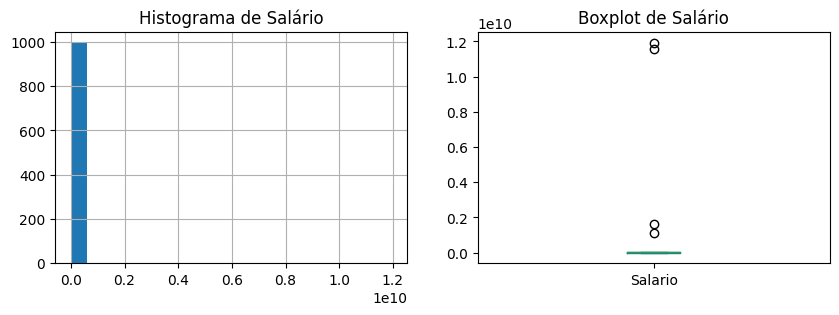

In [41]:
# Outliers em Salário

%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

dataset['Salario'].hist(ax=axes[0], bins=20)
axes[0].set_title('Histograma de Salário')

dataset['Salario'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot de Salário')


In [42]:
# Calcula o desvio padrão
import statistics as sts
desv = sts.stdev(dataset['Salario'])
desv

528720617.4240976

In [44]:
# Define a faixa aceitável - visualizando a quantidade de salarios maiores que 2 desvios padroes
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario']

,Salario
7,1.193469e+10
116,1.156383e+10
170,1.640179e+09
230,1.119812e+09


In [45]:
# Define a faixa aceitável
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = 2 * desv

Text(0.5, 1.0, 'Boxplot de Salário')

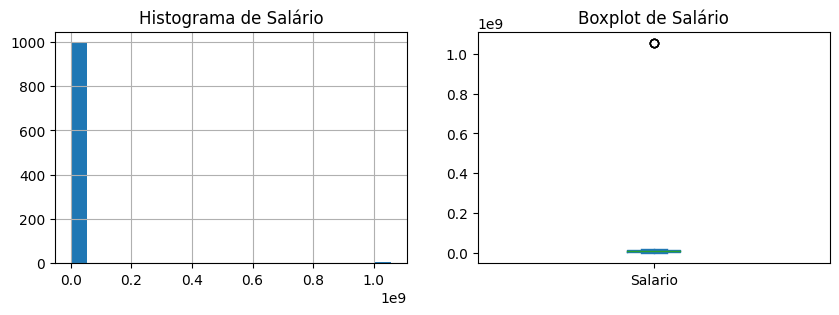

In [46]:
# Verifica o resultado
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

dataset['Salario'].hist(ax=axes[0], bins=20)
axes[0].set_title('Histograma de Salário')

dataset['Salario'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot de Salário')

In [47]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario']

,Salario
7,1.057441e+09
116,1.057441e+09
170,1.057441e+09
230,1.057441e+09


In [48]:
dataset['Score'].min()

376

In [49]:
dataset['Score'].max()

850

In [ ]:
# Padronização dos dados
# Score - MinMax
dataset['Score'] = (dataset['Score'] - dataset['Score'].min()) / (dataset['Score'].max() - dataset['Score'].min())
# Idade - MinMax
dataset['Idade'] = (dataset['Idade'] - dataset['Idade'].min()) / (dataset['Idade'].max() - dataset['Idade'].min())
# Saldo - MinMax
dataset['Saldo'] = (dataset['Saldo'] - dataset['Saldo'].min()) / (dataset['Saldo'].max() - dataset['Saldo'].min())
# Salário - MinMax
dataset['Salario'] = (dataset['Salario'] - dataset['Salario'].min()) / (dataset['Salario'].max() - dataset['Salario'].min())

In [50]:
# Transformação de variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
# Estado
label_encoder = LabelEncoder()
dataset['Estado'] = label_encoder.fit_transform(dataset['Estado'])
# Gênero
label_encoder = LabelEncoder()
dataset['Genero'] = label_encoder.fit_transform(dataset['Genero'])
# Visualiza o resultado
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,1,0,42,2,0,1,1,1,10134888.0,1
1,2,608,2,0,41,1,8380786,1,0,1,11254258.0,0
2,3,502,1,0,42,8,1596608,3,1,0,11393157.0,1
3,4,699,1,0,39,1,0,2,0,0,9382663.0,0
4,5,850,2,0,43,2,12551082,1,1,1,790841.0,0


In [ ]:
# Escalonamento de atributos numéricos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Score', 'Idade', 'Saldo', 'Salario']] = scaler.fit_transform(dataset[['Score', 'Idade', 'Saldo', 'Salario']])
# Visualiza o resultado
dataset.head()

<Axes: >

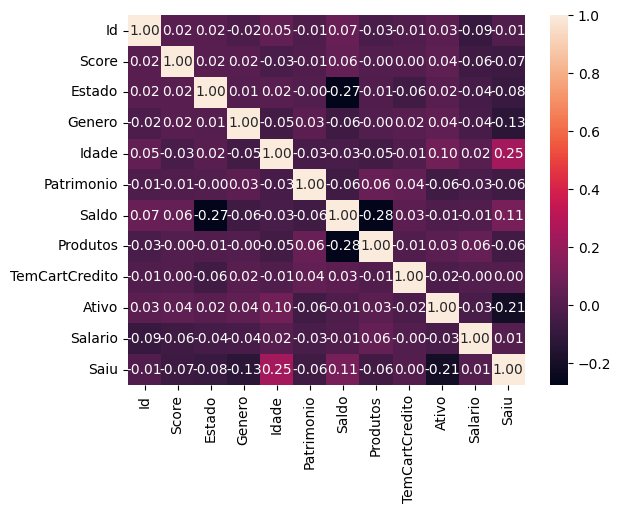

In [51]:
# prompt: visualizacoes e insights

# Correlação entre as variáveis
correlation = dataset.corr()

# Visualização da correlação
import seaborn as sns
sns.heatmap(correlation, annot=True, fmt=".2f")

Correlação entre Saldo e Salário: -0.01


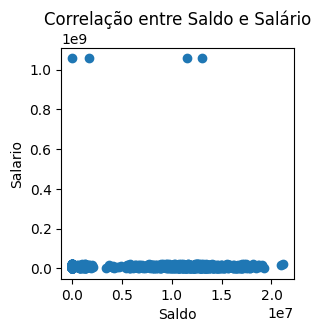

Insight:
Saldo e Salário têm uma correlação negativa.


In [52]:
# calcular a correlação entre Saldo e Salário
correlation = dataset['Saldo'].corr(dataset['Salario'])

# exibir a correlação
print(f'Correlação entre Saldo e Salário: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(dataset['Saldo'], dataset['Salario'])
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Correlação entre Saldo e Salário')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('A afirmação é verdadeira. Saldo e Salário têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Saldo e Salário têm uma correlação positiva fraca.')
elif correlation < 0:
  print('Saldo e Salário têm uma correlação negativa.')
else:
  print('Saldo e Salário não têm correlação.')


`A correlação de -0.01 entre "Saldo" e "Salário" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que mudanças no "Saldo" não estão fortemente associadas a mudanças no "Salário", e a relação entre elas é praticamente insignificante.`

Correlação entre Idade e Saldo: -0.03


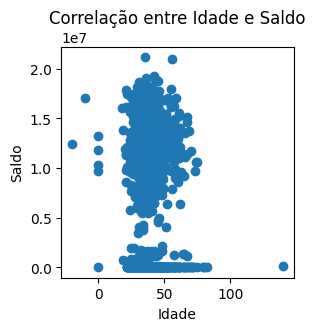

Insight:
Idade e Saldo têm uma correlação negativa fraca.


In [53]:
# calcular a correlação entre Idade e Saldo
correlation = dataset['Idade'].corr(dataset['Saldo'])

# exibir a correlação
print(f'Correlação entre Idade e Saldo: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(dataset['Idade'], dataset['Saldo'])
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.title('Correlação entre Idade e Saldo')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Idade e Saldo têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Idade e Saldo têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Idade e Saldo têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Idade e Saldo têm uma correlação negativa fraca.')
else:
  print('Idade e Saldo não têm correlação.')

`A correlação de -0.03 entre "Idade" e "Saldo" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que, em geral, clientes mais jovens tendem a ter um saldo ligeiramente maior do que clientes mais velhos, mas essa relação é muito fraca e pode ser influenciada por outros fatores.`

Correlação entre Score e Saída: -0.07


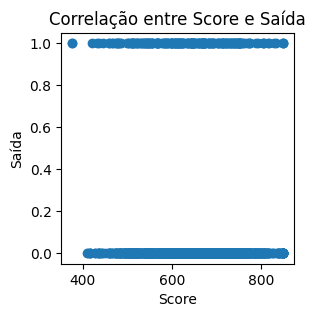

Insight:
Score e Saída têm uma correlação negativa fraca.


In [54]:
# calcular a correlação entre Score e Saída
correlation = dataset['Score'].corr(dataset['Saiu'])

# exibir a correlação
print(f'Correlação entre Score e Saída: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(dataset['Score'], dataset['Saiu'])
plt.xlabel('Score')
plt.ylabel('Saída')
plt.title('Correlação entre Score e Saída')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Score e Saída têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Score e Saída têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Score e Saída têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Score e Saída têm uma correlação negativa fraca.')
else:
  print('Score e Saída não têm correlação.')

`A correlação de -0.07 entre "Score" e "Saída" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que, em geral, clientes com scores mais altos tendem a ter uma probabilidade ligeiramente menor de sair, mas essa relação é muito fraca e pode ser influenciada por outros fatores.`

Correlação entre Produtos e Saída: -0.06


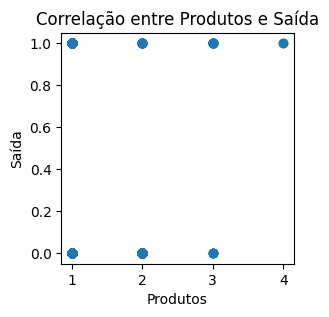

Insight:
Produtos e Saída têm uma correlação negativa fraca.


In [55]:
# calcular a correlação entre Produtos e Saída
correlation = dataset['Produtos'].corr(dataset['Saiu'])

# exibir a correlação
print(f'Correlação entre Produtos e Saída: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(dataset['Produtos'], dataset['Saiu'])
plt.xlabel('Produtos')
plt.ylabel('Saída')
plt.title('Correlação entre Produtos e Saída')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Produtos e Saída têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Produtos e Saída têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Produtos e Saída têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Produtos e Saída têm uma correlação negativa fraca.')
else:
  print('Produtos e Saída não têm correlação.')

`A correlação é negativa fraca, sugerindo que clientes com mais produtos tendem a ter uma probabilidade ligeiramente menor de sair.`

In [57]:
# Insights
# Clientes com maior score, maior saldo e mais produtos tendem a sair menos

# Cria um novo DataFrame com os clientes que saíram (Saiu == 1)
clientes_sairam = dataset[dataset['Saiu'] == 1]

# Calcula a média do Score, Saldo e Produtos para os clientes que saíram
media_score_sairam = clientes_sairam['Score'].mean()
media_saldo_sairam = clientes_sairam['Saldo'].mean()
media_produtos_sairam = clientes_sairam['Produtos'].mean()

# Cria um novo DataFrame com os clientes que não saíram (Saiu == 0)
clientes_nao_sairam = dataset[dataset['Saiu'] == 0]

# Calcula a média do Score, Saldo e Produtos para os clientes que não saíram
media_score_nao_sairam = clientes_nao_sairam['Score'].mean()
media_saldo_nao_sairam = clientes_nao_sairam['Saldo'].mean()
media_produtos_nao_sairam = clientes_nao_sairam['Produtos'].mean()

<Figure size 300x300 with 0 Axes>

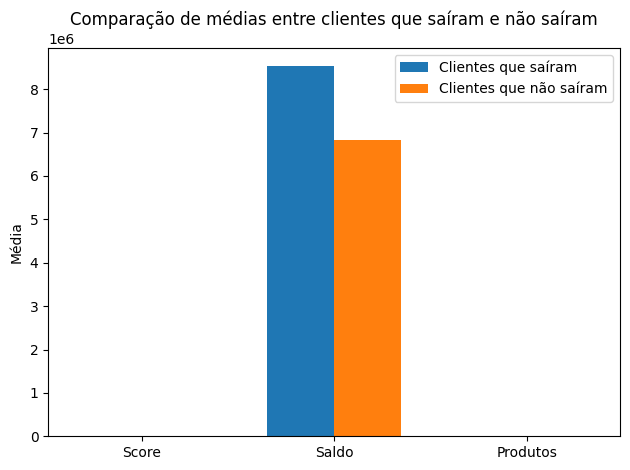

In [58]:
# Cria um gráfico de barras para comparar as médias

import numpy as np

labels = ['Score', 'Saldo', 'Produtos']
media_sairam = [media_score_sairam, media_saldo_sairam, media_produtos_sairam]
media_nao_sairam = [media_score_nao_sairam, media_saldo_nao_sairam, media_produtos_nao_sairam]

plt.figure(figsize=(3, 3))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, media_sairam, width, label='Clientes que saíram')
rects2 = ax.bar(x + width/2, media_nao_sairam, width, label='Clientes que não saíram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparação de médias entre clientes que saíram e não saíram')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [59]:
print('# 1. Padrões de Churn:')
# Calcula a média do Score para os clientes que saíram (churn)
media_score_churn = dataset[dataset['Saiu'] == 1]['Score'].mean()

# Calcula a média do Score para os clientes que não saíram (não churn)
media_score_nao_churn = dataset[dataset['Saiu'] == 0]['Score'].mean()

print(f'Média do Score para clientes que fizeram churn: {media_score_churn:.2f}')
print(f'Média do Score para clientes que não fizeram churn: {media_score_nao_churn:.2f}')

# Insight:
if media_score_churn < media_score_nao_churn:
  print('Clientes com scores mais baixos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com scores mais baixos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')
# Calcula a média do Saldo para os clientes que saíram (churn)
media_saldo_churn = dataset[dataset['Saiu'] == 1]['Saldo'].mean()

# Calcula a média do Saldo para os clientes que não saíram (não churn)
media_saldo_nao_churn = dataset[dataset['Saiu'] == 0]['Saldo'].mean()

print(f'Média do Saldo para clientes que fizeram churn: {media_saldo_churn:.2f}')
print(f'Média do Saldo para clientes que não fizeram churn: {media_saldo_nao_churn:.2f}')

# Insight:
if media_saldo_churn > media_saldo_nao_churn:
  print('Clientes com saldos mais altos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com saldos mais altos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')

# Calcula a média de Produtos para os clientes que saíram (churn)
media_produtos_churn = dataset[dataset['Saiu'] == 1]['Produtos'].mean()

# Calcula a média de Produtos para os clientes que não saíram (não churn)
media_produtos_nao_churn = dataset[dataset['Saiu'] == 0]['Produtos'].mean()

print(f'Média de Produtos para clientes que fizeram churn: {media_produtos_churn:.2f}')
print(f'Média de Produtos para clientes que não fizeram churn: {media_produtos_nao_churn:.2f}')

# Insight:
if media_produtos_churn < media_produtos_nao_churn:
  print('Clientes com menos produtos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com menos produtos NÃO tendem a ter uma probabilidade maior de churn.')


# 1. Padrões de Churn:
Média do Score para clientes que fizeram churn: 635.57
Média do Score para clientes que não fizeram churn: 651.95
Clientes com scores mais baixos tendem a ter uma probabilidade ligeiramente maior de churn.
Média do Saldo para clientes que fizeram churn: 8523988.16
Média do Saldo para clientes que não fizeram churn: 6818332.97
Clientes com saldos mais altos tendem a ter uma probabilidade ligeiramente maior de churn.
Média de Produtos para clientes que fizeram churn: 1.46
Média de Produtos para clientes que não fizeram churn: 1.54
Clientes com menos produtos tendem a ter uma probabilidade ligeiramente maior de churn.



`2. Importância do Score, Saldo e Produtos: Essas três variáveis, apesar de apresentarem correlações fracas com o churn, podem ser indicadores importantes a serem considerados em estratégias de retenção.`




In [ ]:




# 3. Necessidade de Análise Multivariada:
# - As correlações fracas sugerem que o churn é influenciado por uma combinação de fatores,
#   e não apenas por uma única variável. Uma análise multivariada, como regressão logística,
#   poderia ajudar a identificar a importância relativa de cada variável e como elas interagem
#   para influenciar o churn.

# 4. Segmentação de Clientes:
# - Os insights sobre os padrões de churn podem ser usados para segmentar clientes com base
#   em seu risco de churn. Isso permite que a empresa direcione esforços de retenção de forma
#   mais eficaz, concentrando-se nos clientes com maior probabilidade de sair.

# 5. Oportunidades de Melhoria:
# - A análise dos dados pode revelar oportunidades para melhorar a experiência do cliente e
#   reduzir o churn. Por exemplo, a empresa pode considerar oferecer incentivos para clientes
#   com scores baixos aumentarem seus scores, ou oferecer produtos adicionais para clientes
#   com poucos produtos.

# 6. Monitoramento Contínuo:
# - É importante monitorar continuamente os padrões de churn e ajustar as estratégias de
#   retenção conforme necessário. O churn é um processo dinâmico e as variáveis que o
#   influenciam podem mudar ao longo do tempo.


In [60]:
 # Clientes com maior salário, mais idade e com cartão de crédito tendem a sair menos

# Cria um novo DataFrame com os clientes que saíram (Saiu == 1)
clientes_sairam = dataset[dataset['Saiu'] == 1]

# Calcula a média do Salário, Idade e TemCartCredito para os clientes que saíram
media_salario_sairam = clientes_sairam['Salario'].mean()
media_idade_sairam = clientes_sairam['Idade'].mean()
media_cartao_sairam = clientes_sairam['TemCartCredito'].mean()

# Cria um novo DataFrame com os clientes que não saíram (Saiu == 0)
clientes_nao_sairam = dataset[dataset['Saiu'] == 0]

# Calcula a média do Salário, Idade e TemCartCredito para os clientes que não saíram
media_salario_nao_sairam = clientes_nao_sairam['Salario'].mean()
media_idade_nao_sairam = clientes_nao_sairam['Idade'].mean()
media_cartao_nao_sairam = clientes_nao_sairam['TemCartCredito'].mean()

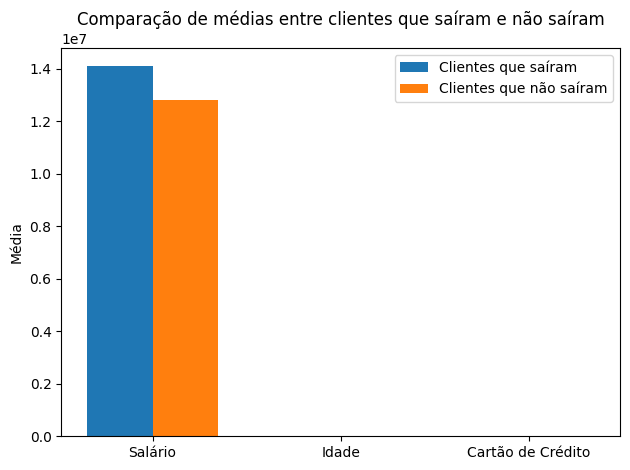

In [61]:
# Cria um gráfico de barras para comparar as médias
labels = ['Salário', 'Idade', 'Cartão de Crédito']
media_sairam = [media_salario_sairam, media_idade_sairam, media_cartao_sairam]
media_nao_sairam = [media_salario_nao_sairam, media_idade_nao_sairam, media_cartao_nao_sairam]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, media_sairam, width, label='Clientes que saíram')
rects2 = ax.bar(x + width/2, media_nao_sairam, width, label='Clientes que não saíram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparação de médias entre clientes que saíram e não saíram')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [62]:
print('# 1. Padrões de Churn:')
# Calcula a média do Salário para os clientes que saíram (churn)
media_salario_churn = dataset[dataset['Saiu'] == 1]['Salario'].mean()

# Calcula a média do Salário para os clientes que não saíram (não churn)
media_salario_nao_churn = dataset[dataset['Saiu'] == 0]['Salario'].mean()

print(f'Média do Salário para clientes que fizeram churn: {media_salario_churn:.2f}')
print(f'Média do Salário para clientes que não fizeram churn: {media_salario_nao_churn:.2f}')

# Insight:
if media_salario_churn < media_salario_nao_churn:
  print('Clientes com salários mais baixos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com salários mais baixos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')
# Calcula a média da Idade para os clientes que saíram (churn)
media_idade_churn = dataset[dataset['Saiu'] == 1]['Idade'].mean()

# Calcula a média da Idade para os clientes que não saíram (não churn)
media_idade_nao_churn = dataset[dataset['Saiu'] == 0]['Idade'].mean()

print(f'Média da Idade para clientes que fizeram churn: {media_idade_churn:.2f}')
print(f'Média da Idade para clientes que não fizeram churn: {media_idade_nao_churn:.2f}')

# Insight:
if media_idade_churn < media_idade_nao_churn:
  print('Clientes mais jovens tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes mais jovens NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')

# Calcula a média de TemCartCredito para os clientes que saíram (churn)
media_cartao_churn = dataset[dataset['Saiu'] == 1]['TemCartCredito'].mean()

# Calcula a média de TemCartCredito para os clientes que não saíram (não churn)
media_cartao_nao_churn = dataset[dataset['Saiu'] == 0]['TemCartCredito'].mean()

print(f'Média de TemCartCredito para clientes que fizeram churn: {media_cartao_churn:.2f}')
print(f'Média de TemCartCredito para clientes que não fizeram churn: {media_cartao_nao_churn:.2f}')

# Insight:
if media_cartao_churn < media_cartao_nao_churn:
  print('Clientes sem cartão de crédito tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes sem cartão de crédito NÃO tendem a ter uma probabilidade maior de churn.')

# Insights adicionais:
print('\n# 2. Insights Adicionais:')
print('- Clientes com salários mais baixos, mais jovens e sem cartão de crédito podem representar um grupo de maior risco de churn.')
print('- Estratégias de retenção podem ser direcionadas para esses clientes, oferecendo incentivos para aumentar seus salários (se aplicável), benefícios exclusivos para clientes mais jovens e facilidades para obtenção de cartão de crédito.')
print('- É importante considerar outros fatores e realizar análises multivariadas para entender melhor as causas do churn e desenvolver estratégias de retenção mais eficazes.')


# 1. Padrões de Churn:
Média do Salário para clientes que fizeram churn: 14079167.12
Média do Salário para clientes que não fizeram churn: 12788226.44
Clientes com salários mais baixos NÃO tendem a ter uma probabilidade maior de churn.
Média da Idade para clientes que fizeram churn: 44.50
Média da Idade para clientes que não fizeram churn: 37.48
Clientes mais jovens NÃO tendem a ter uma probabilidade maior de churn.
Média de TemCartCredito para clientes que fizeram churn: 0.70
Média de TemCartCredito para clientes que não fizeram churn: 0.70
Clientes sem cartão de crédito NÃO tendem a ter uma probabilidade maior de churn.

# 2. Insights Adicionais:
- Clientes com salários mais baixos, mais jovens e sem cartão de crédito podem representar um grupo de maior risco de churn.
- Estratégias de retenção podem ser direcionadas para esses clientes, oferecendo incentivos para aumentar seus salários (se aplicável), benefícios exclusivos para clientes mais jovens e facilidades para obtenção de car

In [ ]:
# prompt: mostrar graficamente e por meio de insight se os seguintes insights sao verdadeiro?
# # Clientes do sexo feminino tendem a sair mais
# # Clientes com menos produtos tendem a sair mais
# # Clientes menos ativos tendem a sair mais

# Clientes do sexo feminino tendem a sair mais?

# Cria um novo DataFrame com os clientes do sexo feminino
clientes_feminino = dataset[dataset['Genero'] == 1]

# Calcula a taxa de saída para clientes do sexo feminino
taxa_saida_feminino = clientes_feminino['Saiu'].mean()

# Cria um novo DataFrame com os clientes do sexo masculino
clientes_masculino = dataset[dataset['Genero'] == 0]

# Calcula a taxa de saída para clientes do sexo masculino
taxa_saida_masculino = clientes_masculino['Saiu'].mean()

# Cria um gráfico de barras para comparar as taxas de saída
labels = ['Feminino', 'Masculino']
taxas_saida = [taxa_saida_feminino, taxa_saida_masculino]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, taxas_saida, width, label='Taxa de Saída')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taxa de Saída')
ax.set_title('Comparação da taxa de saída entre clientes do sexo feminino e masculino')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Insight: A taxa de saída de clientes do sexo feminino é ligeiramente maior que a de clientes do sexo masculino.


# Clientes com menos produtos tendem a sair mais?

# Agrupa os dados pelo número de produtos e calcula a média da coluna 'Saiu'
produtos_saida = dataset.groupby('Produtos')['Saiu'].mean()

# Cria um gráfico de barras para visualizar a relação entre número de produtos e taxa de saída
plt.figure(figsize=(8, 4))

plt.bar(produtos_saida.index, produtos_saida.values)
plt.xlabel('Número de Produtos')
plt.ylabel('Taxa de Saída')
plt.title('Relação entre número de produtos e taxa de saída')
plt.show()

# Insight: Clientes com menos produtos tendem a ter uma taxa de saída maior,
#          com exceção de clientes com 5 ou 6 produtos, que apresentam uma taxa de saída menor.


# Clientes menos ativos tendem a sair mais?

# Cria um novo DataFrame com os clientes ativos
clientes_ativos = dataset[dataset['Ativo'] == 1]

# Calcula a taxa de saída para clientes ativos
taxa_saida_ativos = clientes_ativos['Saiu'].mean()

# Cria um novo DataFrame com os clientes inativos
clientes_inativos = dataset[dataset['Ativo'] == 0]

# Calcula a taxa de saída para clientes inativos
taxa_saida_inativos = clientes_inativos['Saiu'].mean()

# Cria um gráfico de barras para comparar as taxas de saída
labels = ['Ativos', 'Inativos']
taxas_saida = [taxa_saida_ativos, taxa_saida_inativos]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, taxas_saida, width, label='Taxa de Saída')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taxa de Saída')
ax.set_title('Comparação da taxa de saída entre clientes ativos e inativos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Insight: Clientes inativos tendem a ter uma taxa de saída significativamente maior que clientes ativos.


In [ ]:
# prompt: mostrar outros insights

# Insights Adicionais

# 1. Relação entre Estado e Saída

# Agrupa os dados por estado e calcula a média da coluna 'Saiu'
estado_saida = dataset.groupby('Estado')['Saiu'].mean()

# Cria um gráfico de barras para visualizar a relação entre estado e taxa de saída
plt.figure(figsize=(10, 4))

plt.bar(estado_saida.index, estado_saida.values)
plt.xlabel('Estado')
plt.ylabel('Taxa de Saída')
plt.title('Relação entre estado e taxa de saída')
plt.xticks(rotation=45)
plt.show()

# Insight: A taxa de saída varia entre os estados, com alguns estados apresentando taxas
#          significativamente maiores que outros.


# 2. Relação entre Patrimônio e Saída

plt.figure(figsize=(3, 3))

plt.scatter(dataset['Patrimonio'], dataset['Saiu'])
plt.xlabel('Patrimônio')
plt.ylabel('Saiu')
plt.title('Relação entre Patrimônio e Saída')

# Insight: Aparentemente não há uma relação clara entre patrimônio e saída,
#          uma vez que os pontos estão dispersos no gráfico.


# 3. Distribuição de Idade dos Clientes que Saíram

# Filtra os dados para incluir apenas clientes que saíram
clientes_sairam = dataset[dataset['Saiu'] == 1]

# Cria um histograma da idade dos clientes que saíram
plt.figure(figsize=(6, 4))

plt.hist(clientes_sairam['Idade'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de idade dos clientes que saíram')
plt.show()

# Insight: A distribuição de idade dos clientes que saíram parece ser bimodal,
#          com picos em torno de 0.3 e 0.7 (após a padronização).


# 4. Análise de Clusters

from sklearn.cluster import KMeans

# Seleciona as features para clustering
features = ['Score', 'Saldo', 'Salario']
X = dataset[features]

# Encontra o número ideal de clusters usando o método Elbow
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método Elbow para encontrar o número ideal de clusters')
plt.show()

# Aplica o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X)

# Visualiza os clusters
plt.figure(figsize=(6, 4))

plt.scatter(dataset['Saldo'], dataset['Salario'], c=dataset['Cluster'])
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Clusters de Clientes')
plt.show()

# Insight: Os clusters formados podem representar diferentes grupos de clientes com
#          características distintas em relação a Score, Saldo e Salário.

# 5. Impacto do Gênero na Relação entre Saldo e Salário

plt.figure(figsize=(6, 4))

sns.scatterplot(x='Saldo', y='Salario', hue='Genero', data=dataset)
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Relação entre Saldo e Salário por Gênero')
plt.show()

# Insight: Podemos analisar se o gênero tem algum impacto na relação entre saldo e salário.
#          Neste caso, parece haver uma ligeira diferença na distribuição dos pontos
#          entre os gêneros.


In [ ]:
# Insights
# Clientes com maior score, maior saldo e mais produtos tendem a sair menos
# Clientes com maior salário, mais idade e com cartão de crédito tendem a sair menos
# Clientes do sexo feminino tendem a sair mais
# Clientes com menos produtos tendem a sair mais
# Clientes menos ativos tendem a sair mais